In [32]:
#中文采用了清华NLP组提供的THUCNews新闻文本分类数据集的子集
data_address = '../Data_Cn/'
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3"
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

train_data = pd.read_csv(data_address+'cnews.train.txt',sep='\t',names=['label','content'])
test_data = pd.read_csv(data_address+'cnews.test.txt',sep='\t',names=['label','content'])
dev_data = pd.read_csv(data_address+'cnews.val.txt',sep='\t',names=['label','content'])


In [3]:
train_data.head()

,label,content
0,体育,马晓旭意外受伤让国奥警惕 无奈大雨格外青睐殷家军记者傅亚雨沈阳报道 来到沈阳，国奥队依然没有...
1,体育,商瑞华首战复仇心切 中国玫瑰要用美国方式攻克瑞典多曼来了，瑞典来了，商瑞华首战求3分的信心也...
2,体育,冠军球队迎新欢乐派对 黄旭获大奖张军赢下PK赛新浪体育讯12月27日晚，“冠军高尔夫球队迎新...
3,体育,辽足签约危机引注册难关 高层威逼利诱合同笑里藏刀新浪体育讯2月24日，辽足爆发了集体拒签风波...
4,体育,揭秘谢亚龙被带走：总局电话骗局 复制南杨轨迹体坛周报特约记者张锐北京报道 谢亚龙已经被公安...


In [4]:
#按理来说torchtext是支持string标签的，没弄明白怎么搞，还是预处理的时候弄掉吧
#获取标签唯一值字典
status_dict = train_data['label'].unique().tolist()
train_data['d_label'] = train_data['label'].apply(lambda x : status_dict.index(x))
test_data['d_label'] = test_data['label'].apply(lambda x : status_dict.index(x))
dev_data['d_label'] = dev_data['label'].apply(lambda x : status_dict.index(x))

In [5]:
train_data.head()

,label,content,d_label
0,体育,马晓旭意外受伤让国奥警惕 无奈大雨格外青睐殷家军记者傅亚雨沈阳报道 来到沈阳，国奥队依然没有...,0
1,体育,商瑞华首战复仇心切 中国玫瑰要用美国方式攻克瑞典多曼来了，瑞典来了，商瑞华首战求3分的信心也...,0
2,体育,冠军球队迎新欢乐派对 黄旭获大奖张军赢下PK赛新浪体育讯12月27日晚，“冠军高尔夫球队迎新...,0
3,体育,辽足签约危机引注册难关 高层威逼利诱合同笑里藏刀新浪体育讯2月24日，辽足爆发了集体拒签风波...,0
4,体育,揭秘谢亚龙被带走：总局电话骗局 复制南杨轨迹体坛周报特约记者张锐北京报道 谢亚龙已经被公安...,0


In [6]:
#标签分布
from collections import Counter
Counter(list(train_data.label))
Counter(list(train_data.d_label))

Counter({0: 5000,
         1: 5000,
         2: 5000,
         3: 5000,
         4: 5000,
         5: 5000,
         6: 5000,
         7: 5000,
         8: 5000,
         9: 5000})

In [10]:
#保存一下
train_data.to_csv(data_address+'train_data.tsv', sep='\t', header=None,columns=['d_label','content'], index=False, mode="w")
test_data.to_csv(data_address+'test_data.tsv', sep='\t', header=None,columns=['d_label','content'], index=False, mode="w")
dev_data.to_csv(data_address+'dev_data.tsv', sep='\t', header=None, index=False, columns=['d_label','content'], mode="w")

In [26]:
#缺失值
print(train_data[train_data.isnull().T.any()])
print(test_data[test_data.isnull().T.any()])
print(dev_data[dev_data.isnull().T.any()])

Empty DataFrame
Columns: [label, content, d_label, target_list]
Index: []
Empty DataFrame
Columns: [label, content, d_label, target_list]
Index: []
Empty DataFrame
Columns: [label, content, d_label, target_list]
Index: []


/home/joshua/miniconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/joshua/miniconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/joshua/miniconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

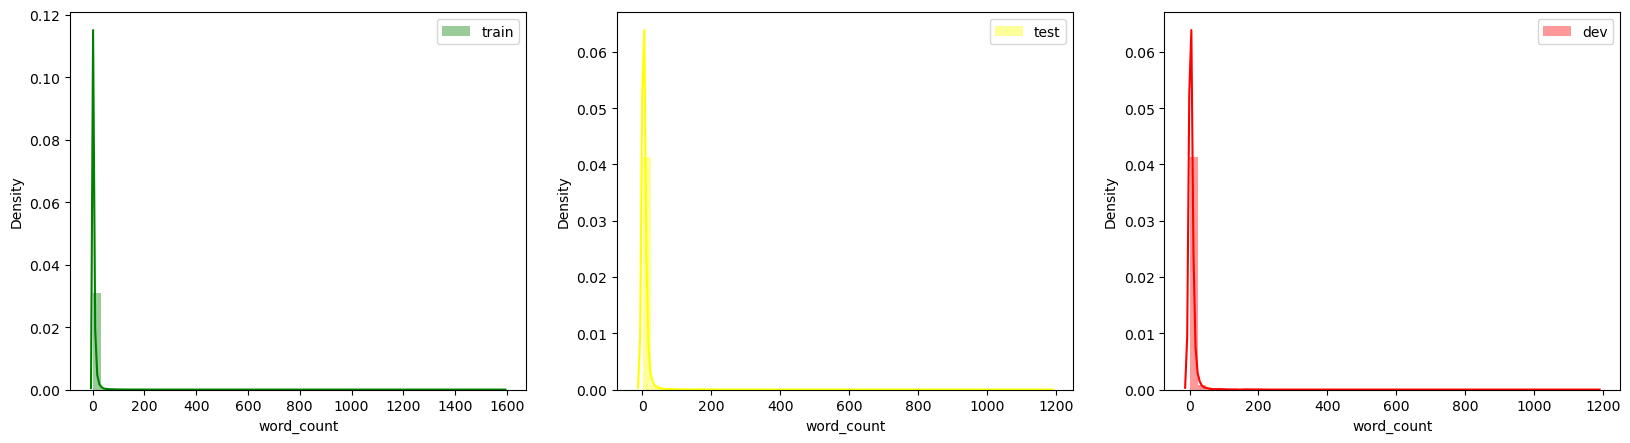

In [42]:
#长度分布1
fig, axes = plt.subplots(ncols=3 ,figsize=(20,5), dpi=100)
train_data['word_count'] = train_data['content'].apply(lambda x:len(str(x).split()))
sns.distplot(train_data['word_count'],ax=axes[0],label='train', color='green')
#长度分布2
test_data['word_count'] = test_data['content'].apply(lambda x:len(str(x).split()))
sns.distplot(test_data['word_count'],ax=axes[1],label='test', color='yellow')
#长度分布3
dev_data['word_count'] = dev_data['content'].apply(lambda x:len(str(x).split()))
sns.distplot(test_data['word_count'],ax=axes[2],label='dev', color='red')
for i in range(3):
    axes[i].legend()
plt.show()

In [43]:
#不太对劲，看看最大值
train_data['word_count'].max()
# 需要设置最大截断

1587